## generating data

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def write_pseudovoight(A,x,w=5,nu=0.25,spec_len=500):
    x_ = np.linspace(0,spec_len-1,spec_len)
    lorentz = A*( nu*2/np.pi*w/(4*(x-x_)**2 + w**2) )
    gauss = A * (4*np.log(2)/np.pi**0.5 /w) * np.exp(-4*np.log(2)*(x-x_)**2/w**2)
    y = nu*lorentz + (1-nu)*gauss
    return y

def add_noise(I,y,noise=0.1,spec_len=500):
    noise = np.random.normal(0, noise*(I), spec_len) # make some noise even if 0
    noisy = y + noise
    noisy[noisy<0] = 0
    return noisy

x_,y_ = (100,100)
mask = np.zeros((x_,y_))
mask[10:,10:] = 1

def pv_area(I,w,nu):
   return I*w*np.pi/2/ ((1-nu)*(np.pi*np.log(2))**0.5 + nu)

def pv_intensity(A,w,nu):
   return A/w/np.pi*2* ((1-nu)*(np.pi*np.log(2))**0.5 + nu)


In [2]:
from tqdm import tqdm
import h5py
datapath = '/home/m3learning/Northwestern/Northwestern_link/model_tests/fake_pv_curves_/'

fwhm, nu_ = 50, 0.7


In [3]:
# with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
#     for i in tqdm(range(20)):
#         noise_ = (i/20)**(1.5)
#         try: dset = f[f'{noise_:06.3f}_noise']
#         except: dset = f.create_dataset(f'{noise_:06.3f}_noise', shape=(100,100,500), dtype=np.float32)
#         for x_ in range(dset.shape[0]):
#             for y_ in range(dset.shape[1]):
#                 I = y_/5
#                 A = pv_area(I, w=fwhm, nu=nu_)
#                 if mask[x_, y_]:
#                     dset[x_, y_] = add_noise(I,
#                                             write_pseudovoight(A, x_*2, fwhm, nu_),
#                                             noise = noise_)
#                 else: dset[x_, y_] = add_noise(I,
#                                                np.zeros(dset.shape[2]),
#                                                noise = noise_)
#         f.flush()

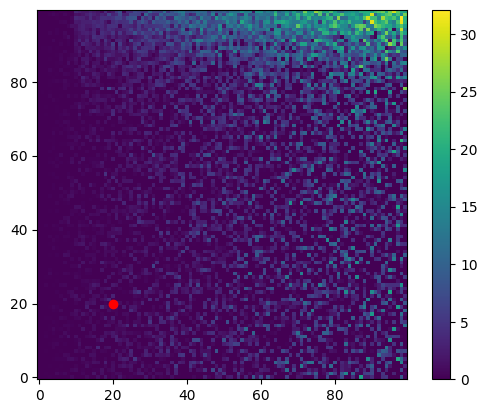

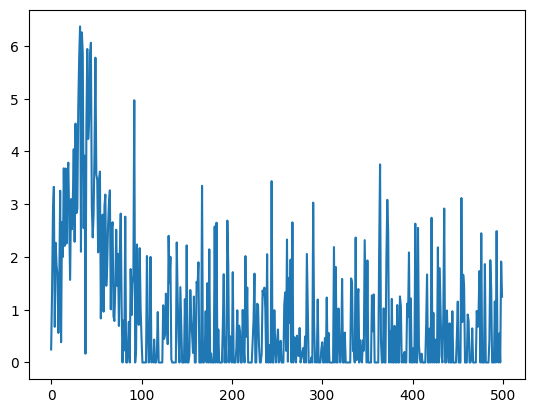

In [4]:
i,x,y,s = 10,20,20,200
noise_ = (i/20)**(1.5)
with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
    dset = f[f'{noise_:06.3f}_noise'][:]
    plt.imshow(dset[:,:,s],origin='lower')
    plt.plot(y,x,'ro')
    plt.colorbar()
    plt.show()
    plt.plot(dset[x,y,:])
    plt.show()

In [5]:
with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
    dset_list = list(f.keys())
    # dset = f[f'{noise_}_noise'][:]
dset_list

['00.000_noise',
 '00.011_noise',
 '00.032_noise',
 '00.058_noise',
 '00.089_noise',
 '00.125_noise',
 '00.164_noise',
 '00.207_noise',
 '00.253_noise',
 '00.302_noise',
 '00.354_noise',
 '00.408_noise',
 '00.465_noise',
 '00.524_noise',
 '00.586_noise',
 '00.650_noise',
 '00.716_noise',
 '00.784_noise',
 '00.854_noise',
 '00.926_noise']

### Visualize raw

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
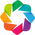

BokehModel(combine_events=True, render_bundle={'docs_json': {'0339505e-4ef5-4175-87d3-1f7335df7bb9': {'version…

In [6]:
import holoviews as hv
import panel as pn
from functools import lru_cache
import h5py

hv.extension('bokeh')
pn.extension('bokeh')

@lru_cache(maxsize=10)
def select_datacube(i):
    # noise_ = i**(1.5)
    with h5py.File(f'{datapath}/fake_pv_data.h5','a') as f:
        return f[dset_list[i]][:]

def plot_datacube_img(i, s):
    datacube = select_datacube(i)
    # data_ = np.flipud(datacube[:, :, s])
    data_ = np.flipud(datacube[:, :, s].T)
    
    return hv.Image(data_, bounds=(0, 0, data_.shape[0], data_.shape[1]),
                    kdims=[hv.Dimension('x', label='X Position'), hv.Dimension('y', label='Y Position')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(cmap='viridis', colorbar=True, clim=(0, datacube.max()),
                           width=350, height=300)

def plot_datacube_spectrum(i, x, y):
    datacube = select_datacube(i)
    return hv.Curve(datacube[x, y],
                    kdims=[hv.Dimension('spectrum', label='Spectrum Value')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(width=350, height=300,
                           ylim=(0, datacube.max()), xlim=(0, 500),
                                     axiswise=True, shared_axes=False)

def show_dot(x, y): 
    return hv.Scatter([(x, y)]).opts( color='red', size=5, marker='o',
                                     axiswise=True, shared_axes=False)

def show_vline(s): 
    return hv.VLine(int(s)).opts(
        color='black', line_width=2,
        axiswise=True, shared_axes=False)
    

# Create interactive widgets
i_slider = pn.widgets.IntSlider(name='Noise level', value=0, start=0, end=19)
x_slider = pn.widgets.IntSlider(name='x', value=25, start=0, end=dset.shape[0]-1)
y_slider = pn.widgets.IntSlider(name='y', value=25, start=0, end=dset.shape[1]-1)
s_slider = pn.widgets.IntSlider(name='spectral value', value=0, start=0, end=499)

# Create dynamic maps for image and spectrum plots
img_dmap = hv.DynamicMap(pn.bind(plot_datacube_img, i=i_slider, s=s_slider))
spec_dmap = hv.DynamicMap(pn.bind(plot_datacube_spectrum, i=i_slider, x=x_slider, y=y_slider))

# Dynamic maps for the red dot and vertical line
dot_dmap = hv.DynamicMap(pn.bind(show_dot, x=x_slider, y=y_slider))
vline_dmap = hv.DynamicMap(pn.bind(show_vline, s=s_slider))

# Layout with widgets and plots
dmap = pn.Column(
    pn.Row(i_slider, s_slider),
    pn.Row(x_slider, y_slider),
    (img_dmap*dot_dmap + spec_dmap*vline_dmap).opts(shared_axes=True,axiswise=True)
)

dmap


In [7]:
dmap.clear()

## Train model

2024-10-23 19:44:14.581704: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 19:44:14.612843: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-23 19:44:14.612885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 19:44:14.614264: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-23 19:44:14.620262: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 19:44:14.621006: I tensorflow/core/platform/cpu_feature_guard.cc:1

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
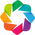

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: zhang-xinqiao. Use `wandb login --relogin` to force relogin


True

In [8]:
import sys
sys.path.append('./../')
sys.path.append('./../../src/') # path to the m3_learning/src directory
%load_ext autoreload
%autoreload 2

from m3_learning.nn.STEM_AE_multimodal import STEM_AE as stem
from m3_learning.nn.STEM_AE_multimodal.Dataset import EELS_Gaussian_Sampler,custom_collate_fn, STEM_EELS_Dataset, EELS_Embedding_Dataset
import wandb

wandb.login()

In [9]:
import torch
class Indexing_Dataset(torch.utils.data.Dataset):
    def __init__(self, dset):
        self.dset = dset
        self.shape = dset.shape
        self.spec_len = dset.shape[-1]

    def __len__(self):
        return len(self.dset)

    def __getitem__(self, idx):
        return idx, self.dset[idx]/self.dset[idx].max()

In [10]:
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

class fake_pv_FitterAutoencoder_1D(stem.FitterAutoencoder_1D):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def compile_model(self):
        """function that complies the neural network model
        """
        self.Fitter = stem.Multiscale1DFitter(function=self.function,
                                 x_data = self.dset,
                                 input_channels=self.dset.shape[1],
                                 num_params=self.num_params,
                                 num_fits=self.num_fits,
                                 limits=self.limits,
                                 device='cuda:0',
                                 flatten_from = 1,
                            )
        self.Fitter = self.Fitter.to(self.device)
        # sets the datatype of the model to float32
        self.Fitter.type(torch.float32)

        # sets the optimizers
        self.optimizer = torch.optim.Adam(
            self.Fitter.parameters(), lr=self.learning_rate
        )
        
    
    def get_embedding(self, data, batch_size=32,train=True,check=None):
        """extracts embeddings from the data

        Args:
            data (torch.tensor): data to get embeddings from
            batch_size (int, optional): batchsize for inference. Defaults to 32.

        Returns:
            torch.tensor: predicted embeddings
        """

        # builds the dataloader
        dataloader = DataLoader(data, batch_size, shuffle=False)
        s = data.shape
        try:
            try: h = h5py.File(f'{self.folder}/{self.emb_h5}','w')
            except: h = h5py.File(f'{self.folder}/{self.emb_h5}','r+')

            try: check = self.checkpoint.split('/')[-1][:-4]
            except: check=check
            
            # make embedding dataset
            try:
                embedding_ = h.create_dataset(f'embedding_{check}', 
                                            #   data = np.zeros([s[0], s[1], self.num_fits, self.num_params]),
                                              shape=(s[0], s[1], self.num_fits, self.num_params),
                                              dtype='float32')  
            except: 
                embedding_ = h[f'embedding_{check}']
                
            # make fitted dataset
            try:
                fits_ = h.create_dataset(f'fits_{check}', 
                                        #  data = np.zeros([s[0],self.num_fits,s[1],s[2]]),
                                         shape = (s[0],s[1],self.num_fits,s[2]),
                                         dtype='float32')  
            except:
                fits_ = h[f'fits_{check}']

            self.embedding = embedding_
            self.fits = fits_

        except Exception as error:
            print(error) 
            assert train,"No h5_dataset embedding dataset created"
            print('Warning: not saving to h5')
                
        if train: 
            print('Created empty h5 embedding datasets to fill during training')
            return 1 # do not calculate. 
            # return true to indicate this is filled during training

        else:
            s=embedding_.shape
            for i, (_,x) in enumerate(tqdm(dataloader, leave=True, total=len(dataloader))):
                with torch.no_grad():
                    value = x
                    batch_size = x.shape[0]
                    test_value = Variable(value.to(self.device))
                    test_value = test_value.float()
                    embedding,fit = self.Fitter(test_value,return_sum=False)
                    
                    self.embedding[i*batch_size:(i+1)*batch_size] = embedding.reshape(batch_size,s[1],s[2],s[3]).cpu().detach().numpy()
                    self.fits[i*batch_size:(i+1)*batch_size] = fit.reshape(batch_size,s[1],self.num_fits,-1)*x.max(axis=(0,1)).cpu().detach().numpy()
                   
        h.close()


In [11]:
emb_path = '/home/m3learning/Northwestern/Northwestern_link/model_tests/fake_pv_curves_rand_sampler/'


### regular sampler and fitter 1D

In [16]:
from numpy import save

emb_path = '/home/m3learning/Northwestern/Northwestern_link/model_tests/fake_pv_curves_rand_sampler/'
for dset_name in dset_list:
    print(dset_name)
    with h5py.File(f'{datapath}fake_pv_data.h5','r') as f:
        dataset = Indexing_Dataset( f[dset_name][:].reshape(-1,1,500) )
        
    model = fake_pv_FitterAutoencoder_1D(function=stem.generate_pseudovoigt_1D,
                                        dset = dataset,
                                        input_channels=1,
                                        num_params=4,
                                        num_fits=1,
                                        limits=[1000, 500, 500], # A, mean, fwhm 
                                        device='cuda:0',
                                        learning_rate = 3e-3,
                                        folder=f'{emb_path}/{dset_name}',
                                        wandb_project='fit_noisy_pv',
                                    )    
    model.Train(dataset, epochs=50, batch_size=100, minibatch_logging_rate=99,
                with_scheduler=False,wandb_init={'notes':dset_name})

00.000_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 115.49it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 112.64it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 122.37it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 117.24it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 123.07it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 115.53it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.45it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.99it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.30it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.31it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.27it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 122.05it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 111.18it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 112.73it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 116.76it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.71it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.35it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.61it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.62it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.74it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.39it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.31it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.98it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.50it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.22it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 120.01it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.28it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.60it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.10it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.69it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.22it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.49it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 123.30it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.78it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.90it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.56it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.66it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.67it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.17it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.08it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.04it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.89it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.15it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.16it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.15it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.71it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.62it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 140.79it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 140.39it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.35it/s]


Epoch: 049/050 | Train Loss: nan
.............................
00.011_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 124.03it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.75it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.11it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 117.54it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 114.57it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.99it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.31it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.85it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.18it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.70it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 126.21it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.15it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.31it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.10it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.95it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.47it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.86it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.00it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.76it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.17it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.00it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.87it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.77it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.17it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.21it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.68it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.71it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 123.99it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.50it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.30it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.49it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.09it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.00it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.26it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.23it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.93it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 106.96it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.28it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.82it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 139.26it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 141.03it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 141.43it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 139.98it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 140.97it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.43it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.54it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.50it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 139.77it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.63it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 140.79it/s]


Epoch: 049/050 | Train Loss: nan
.............................
00.032_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 111.62it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 121.59it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 139.67it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.12it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 143.92it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 142.65it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 142.33it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 142.89it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.74it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 141.21it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 142.81it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 142.99it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 143.71it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 141.94it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 143.49it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 143.27it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 141.18it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.28it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 142.03it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.85it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.45it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.48it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 142.52it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.88it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 139.26it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 140.61it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 140.39it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 140.61it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 141.05it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.37it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.16it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.15it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.05it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.27it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 113.10it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 127.92it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.41it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.11it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.44it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.09it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.77it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.94it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.53it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 126.92it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.65it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.57it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.65it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 127.40it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.32it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.94it/s]

Epoch: 049/050 | Train Loss: nan
.............................
00.058_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 132.55it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.98it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.00it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 127.97it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.10it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.65it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.42it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 127.74it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 124.76it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.55it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.59it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.67it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.34it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.28it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.73it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.86it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.93it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.92it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.78it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.39it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.76it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.66it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.75it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.63it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 116.92it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 108.37it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.29it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.70it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.99it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 126.93it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.16it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 124.43it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 124.14it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.99it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 123.02it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.55it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 126.47it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.29it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.13it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.76it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.54it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.99it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.47it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.07it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.30it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.38it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.09it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.71it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.90it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.18it/s]

Epoch: 049/050 | Train Loss: nan
.............................
00.089_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 132.53it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.93it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.15it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.92it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.60it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.45it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.38it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.09it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.48it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.42it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.67it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 119.11it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.12it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.13it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.61it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.57it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.08it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.78it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.57it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.61it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.11it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.58it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.85it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.36it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.56it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.79it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.92it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.07it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.60it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.32it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.98it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.30it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.02it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.87it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.36it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.39it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.22it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.64it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 120.50it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 114.45it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 124.68it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.93it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.25it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.04it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.81it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.26it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.07it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.90it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.21it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.72it/s]

Epoch: 049/050 | Train Loss: nan
.............................
00.125_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 133.38it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.59it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.10it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.13it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 117.15it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.51it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.75it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.20it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.38it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.45it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 121.29it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 126.80it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.80it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.55it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 120.96it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 120.47it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.10it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 124.11it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.03it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.03it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.65it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.78it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.68it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.03it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.60it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.40it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.84it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.15it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.63it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.84it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.90it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.88it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.71it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.80it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.60it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.22it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.65it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.97it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.33it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 127.77it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.31it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.14it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.61it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.25it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.20it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.98it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 108.05it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.69it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.71it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.03it/s]

Epoch: 049/050 | Train Loss: nan
.............................
00.164_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 133.72it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.20it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.08it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.72it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.91it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.69it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.04it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.96it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.01it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.66it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.81it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.10it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.27it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.90it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.12it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.58it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.85it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.87it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.64it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.68it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.12it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.74it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.57it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.89it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.93it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.37it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.92it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.86it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.40it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.54it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.38it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.71it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.76it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.81it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.13it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.68it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.79it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.28it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.39it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.66it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.47it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 126.49it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.78it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.06it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.16it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.68it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.68it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.07it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.93it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.04it/s]

Epoch: 049/050 | Train Loss: nan
.............................
00.207_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 132.70it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.03it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.11it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.72it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.88it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.75it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.24it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.58it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.34it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.34it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 121.41it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.88it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.20it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.30it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.93it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.74it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.46it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.11it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.57it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.03it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.23it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.41it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.42it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.10it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.70it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.16it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.67it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.85it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.87it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.56it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.76it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.01it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.92it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.66it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.14it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.15it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.66it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.56it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.38it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.59it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.07it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.93it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.26it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.67it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.03it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.47it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.38it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.19it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.61it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 127.73it/s]

Epoch: 049/050 | Train Loss: nan
.............................
00.253_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 121.38it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 129.04it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.64it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.80it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.12it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.72it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.97it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.15it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.37it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.06it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.45it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.07it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.47it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.08it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.11it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.24it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.45it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.03it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.81it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.01it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.05it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.13it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.80it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.43it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.99it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.89it/s]


Epoch: 025/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.14it/s]


Epoch: 026/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.38it/s]


Epoch: 027/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.93it/s]


Epoch: 028/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.72it/s]


Epoch: 029/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 111.31it/s]


Epoch: 030/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.57it/s]


Epoch: 031/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.18it/s]


Epoch: 032/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 122.40it/s]


Epoch: 033/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.69it/s]


Epoch: 034/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.02it/s]


Epoch: 035/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.00it/s]


Epoch: 036/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 117.28it/s]


Epoch: 037/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.64it/s]


Epoch: 038/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 128.24it/s]


Epoch: 039/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.13it/s]


Epoch: 040/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.88it/s]


Epoch: 041/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 134.51it/s]


Epoch: 042/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.50it/s]


Epoch: 043/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.86it/s]


Epoch: 044/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 131.87it/s]


Epoch: 045/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.23it/s]


Epoch: 046/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 113.41it/s]


Epoch: 047/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.09it/s]


Epoch: 048/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.42it/s]

Epoch: 049/050 | Train Loss: nan
.............................
00.302_noise


l2_batchwise_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
sparse_max_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
weighted_ln_loss,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
l2_batchwise_loss,0.0
mse_loss,nan
sparse_max_loss,0.0
train_loss,nan
weighted_ln_loss,0.0


100%|██████████| 100/100 [00:00<00:00, 124.28it/s]


Epoch: 000/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.26it/s]


Epoch: 001/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.09it/s]


Epoch: 002/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.08it/s]


Epoch: 003/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.11it/s]


Epoch: 004/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.03it/s]


Epoch: 005/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.32it/s]


Epoch: 006/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 126.01it/s]


Epoch: 007/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 127.18it/s]


Epoch: 008/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.92it/s]


Epoch: 009/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.96it/s]


Epoch: 010/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.11it/s]


Epoch: 011/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.43it/s]


Epoch: 012/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.83it/s]


Epoch: 013/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 135.52it/s]


Epoch: 014/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.14it/s]


Epoch: 015/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 130.25it/s]


Epoch: 016/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 136.35it/s]


Epoch: 017/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.11it/s]


Epoch: 018/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 138.22it/s]


Epoch: 019/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 125.07it/s]


Epoch: 020/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 132.41it/s]


Epoch: 021/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 133.78it/s]


Epoch: 022/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.44it/s]


Epoch: 023/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 139.00it/s]


Epoch: 024/050 | Train Loss: nan
.............................


100%|██████████| 100/100 [00:00<00:00, 137.52it/s]


Epoch: 025/050 | Train Loss: nan
.............................


 17%|█▋        | 17/100 [00:00<00:00, 122.73it/s]


KeyboardInterrupt: 

## Get embeddings


In [12]:

import glob
model = fake_pv_FitterAutoencoder_1D(function=stem.generate_pseudovoigt_1D,
                                    dset = dataset,
                                    input_channels=1,
                                    num_params=4,
                                    num_fits=1,
                                    limits=[1000, 500, 500], # A, mean, fwhm 
                                    device='cuda:0',
                                    learning_rate = 3e-5,
                                    # wandb_project='fit_noisy_pv_gaussian_batch_sampling',

                                    )
                                  

NameError: name 'dataset' is not defined

In [18]:
datapath,emb_path

('/home/m3learning/Northwestern/Northwestern_link/model_tests/fake_pv_curves_/',
 '/home/m3learning/Northwestern/Northwestern_link/model_tests/fake_pv_curves_rand_sampler/')

In [28]:
import glob
for dset_name in dset_list:
    print(dset_name)
    with h5py.File(f'{datapath}fake_pv_data.h5','r') as f:
        dataset = Indexing_Dataset( f[dset_name][:].reshape(-1,1,500) )         
        checks = glob.glob(f'{emb_path}/{dset_name}/*.pkl')
        checks.sort()
        model.load_weights(checks[-1])
        model.get_embedding(dataset, 
                            batch_size=100, train=False)

00.000_noise
embedding available
Generated available


100%|██████████| 100/100 [00:04<00:00, 20.26it/s]


00.011_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 231.91it/s]


00.032_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 230.82it/s]


00.058_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 229.52it/s]


00.089_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 231.37it/s]


00.125_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 234.22it/s]


00.164_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 230.82it/s]


00.207_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 218.25it/s]


00.253_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 231.08it/s]


00.302_noise
embedding available
Generated available


100%|██████████| 100/100 [00:00<00:00, 216.72it/s]

00.354_noise


IndexError: list index out of range

In [21]:
with model.open_embedding_h() as h:
    print(h.keys())

<KeysViewHDF5 ['embedding_(2024-10-23)_epoch:0025_l1coef:0.0000_lr:0.00300_trainloss:nan', 'fits_(2024-10-23)_epoch:0025_l1coef:0.0000_lr:0.00300_trainloss:nan']>


In [22]:
model

## VIZ

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
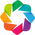

BokehModel(combine_events=True, render_bundle={'docs_json': {'6ad0dcdf-22f8-413c-8b40-260aadc91ffa': {'version…

In [13]:

from turtle import title
import holoviews as hv
import panel as pn
from functools import lru_cache
import h5py

hv.extension('bokeh')
pn.extension('bokeh')

@lru_cache(maxsize=10)
def select_datacube(i):
    # noise_ = i**(1.5)
    with h5py.File(f'{datapath}fake_pv_data.h5','a') as f:
        return f[dset_list[i]][:]
    # 10000,1,500
@lru_cache(maxsize=10)
def select_embedding(i):
    # noise_ = i**(1.5)
    with h5py.File(f'{datapath}/{dset_list[i]}/embeddings_1D.h5','a') as f:
        key = [k for k in list(f.keys()) if 'embedding_' in k][0]
        return f[key][:].reshape(100,100,-1)
    # 10000,1,4
@lru_cache(maxsize=10)
def select_fits(i):
    # noise_ = i**(1.5)
    with h5py.File(f'{datapath}/{dset_list[i]}/embeddings_1D.h5','a') as f:
        key = [k for k in list(f.keys()) if 'fits_' in k][0]
        return f[key][:].reshape(100,100,-1)
    # 10000,1,500
    
def plot_datacube_img(i, s):
    datacube = select_datacube(i)
    # data_ = np.flipud(datacube[:, :, s])
    data_ = np.flipud(datacube[:, :, s].T)
    
    return hv.Image(data_, bounds=(0, 0, data_.shape[0], data_.shape[1]),
                    kdims=[hv.Dimension('x', label='X Position'), hv.Dimension('y', label='Y Position')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(cmap='viridis', colorbar=True, clim=(0, datacube.max()),
                           width=350, height=300, title='Datacube Intensity')

def plot_embedding_img(i, par):
    datacube = select_embedding(i)
    # data_ = np.flipud(datacube[:, :, s])
    data_ = np.flipud(datacube[:, :, par].T)
    
    return hv.Image(data_, bounds=(0, 0, data_.shape[0], data_.shape[1]),
                    kdims=[hv.Dimension('x', label='X Position'), hv.Dimension('y', label='Y Position')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(cmap='viridis', colorbar=True, clim=(0, data_.max()),
                           width=350, height=300)

def plot_fits_img(i, s):
    datacube = select_fits(i)
    # data_ = np.flipud(datacube[:, :, s])
    data_ = np.flipud(datacube[:, :, s].T)
    
    return hv.Image(data_, bounds=(0, 0, data_.shape[0], data_.shape[1]),
                    kdims=[hv.Dimension('x', label='X Position'), hv.Dimension('y', label='Y Position')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(cmap='viridis', colorbar=True, clim=(0, datacube.max()),
                           width=350, height=300, title='Fitted Intensity')


def plot_datacube_spectrum(i, x, y):
    datacube = select_datacube(i)
    return hv.Curve(datacube[x, y],
                    kdims=[hv.Dimension('spectrum', label='Spectrum Value')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(width=350, height=300,
                           ylim=(0, datacube.max()), xlim=(0, 500),
                                     axiswise=True, shared_axes=False)
def plot_fit_spectrum(i, x, y):
    datacube = select_fits(i)
    return hv.Curve(datacube[x, y],
                    kdims=[hv.Dimension('spectrum', label='Spectrum Value')],
                    vdims=[hv.Dimension('intensity', label='Intensity')],
                    ).opts(width=350, height=300,
                           ylim=(0, datacube.max()), xlim=(0, 500),
                                     axiswise=True, shared_axes=False)

def show_dot(x, y): 
    return hv.Scatter([(x, y)]).opts( color='red', size=5, marker='o',
                                     axiswise=True, shared_axes=False)

def show_vline(s): 
    return hv.VLine(int(s)).opts(
        color='black', line_width=2,
        axiswise=True, shared_axes=False)
    

# Create interactive widgets
i_slider = pn.widgets.IntSlider(name='Noise level', value=0, start=0, end=19)
x_slider = pn.widgets.IntSlider(name='x', value=25, start=0, end=dset.shape[0]-1)
y_slider = pn.widgets.IntSlider(name='y', value=25, start=0, end=dset.shape[1]-1)
s_slider = pn.widgets.IntSlider(name='spectral value', value=0, start=0, end=499)

# Dynamic maps for the red dot and vertical line
dot_dmap = hv.DynamicMap(pn.bind(show_dot, x=x_slider, y=y_slider))
vline_dmap = hv.DynamicMap(pn.bind(show_vline, s=s_slider))

# Create dynamic maps for image and spectrum plots
img_dmap = hv.DynamicMap(pn.bind(plot_datacube_img, i=i_slider, s=s_slider))
fit_img_dmap = hv.DynamicMap(pn.bind(plot_fits_img, i=i_slider, s=s_slider))

spec_dmap = hv.DynamicMap(pn.bind(plot_datacube_spectrum, i=i_slider, x=x_slider, y=y_slider))
zero_spec_dmap = hv.DynamicMap(pn.bind(plot_datacube_spectrum, i=0, x=x_slider, y=y_slider))
fit_spec_dmap = hv.DynamicMap(pn.bind(plot_fit_spectrum, i=i_slider, x=x_slider, y=y_slider))

embedding_dmaps = [hv.DynamicMap(pn.bind(plot_embedding_img, i=i_slider, par=par))*dot_dmap for par in range(4)]

# Layout with widgets and plots
dmap = pn.Column(
    pn.Row(i_slider, s_slider),
    pn.Row(x_slider, y_slider),
    (img_dmap*dot_dmap + \
        fit_img_dmap*dot_dmap + \
        spec_dmap*fit_spec_dmap*zero_spec_dmap*vline_dmap).opts(shared_axes=True,axiswise=True),
    hv.Layout(embedding_dmaps).cols(4)
)

dmap
